# COGS 118B - Final Project

# Climate Change Belief Twitter Analysis

## Group members
- Yudong Chen
- Alexander Zhou
- Qianxia Hui

# Abstract 
Our project aims to explore public sentiments and stances towards climate change through a comprehensive analysis of over 15 million tweets collected over 13 years. The data we use encapsulates a wide range of aspects of the tweets data, including stance on climate change, sentiment of the message, aggressiveness, temperature at the time and place, gender of the sender, topic categories, and natural disasters that occurred within the timeframe. By employing unsupervised clustering models like K-means, Gaussian Mixture, and hierarchical clustering, our research seeks to identify distinct clusters within the dataset, thereby uncovering patterns and characteristics that correlate with public opinion on climate change. The performance of our analysis will be measured using metrics such as silhouette scores, adjusted rand indexes, and statistical tests like t-test to evaluate the alignment of the clusters with the true labels. We are also meticulously considering ethical and privacy issues, ensuring the anonymity and privacy of individuals in the dataset and adhering to ethical guidelines in data analysis. 

# Background

The climate issue has been an increasingly urgent concern in today's world. The IPCC report in 2021 indicates a critical threshold: Earth's temperature has already increased by approximately 1.1 degrees Celsius above pre-industrial levels <a name="ipcc"></a>[<sup>[1]</sup>](#ipccnote). This single fact captures the severity of the impending climate crisis, which has undoubtedly become a popular topic in public conversation. Our research builds on a growing volume of work evaluating this public sentiment and opinion on climate change via social media platforms, particularly Twitter, and our interest derives from the importance of public engagement in social issues and the need to understand how the public perceives climate change issues today. Recent studies have used large datasets collected from social media platforms to reveal trends, feelings, and stances on climate change, demonstrating the potential of social media as a lens to see the global debate on this crucial topic.

Our research draws on a comprehensive dataset described in a foundational paper, which examined over 15 million tweets about climate change collected over 13 years <a name="article2"></a>[<sup>[2]</sup>](#article2note). This dataset contains a variety of characteristics, including sentiment, attitude on climate change, gender, geographic location, and themes covered, among others. The investigation revealed important insights into how public opinion on climate change evolved - specifically the debate between climate change believers and deniers - revealing trends across demographics and geographic regions. It also highlighted the impact of major environmental disasters on public discourse, as well as how people's attitudes can vary with demographic factors and local temperature anomalies.

Another crucial study focuses on examining the dataset in depth, concentrating on the data collecting and preprocessing procedures <a name="article3"></a>[<sup>[3]</sup>](#article3note). It provides a comprehensive description and analysis of the different variables of the dataset. It also stressed the use of powerful machine learning techniques, such as BERT, LSTM, and CNN, to process and analyze data, including sentiment analysis, stance detection, and topic modeling. This study emphasized the necessity of a multidimensional approach to understanding the complex dynamics of climate change discourse on Twitter, providing a solid foundation for future research in this field.

These key studies demonstrate the importance of social media analysis in capturing the nuanced perspectives of the global population on climate change. They also set a precedent for using advanced computational approaches to analyze the large amounts of data collected on platforms such as Twitter, providing essential insights into public feelings, views, and reactions to climate change-related events. Our research aims to advance this line of investigation by using unsupervised learning approaches to categorize climate change feelings and stances, contributing to a more in-depth, data-driven understanding of public discourse on this critical global problem.


# Problem Statement

> Does location and average temperature deviation correlate strongly with sentiments about climate change on twitter?

We tackle the challenge of uncovering patterns in public sentiments and stances towards climate change, as expressed in a comprehensive dataset of over 15 million tweets collected over 13 years. The problem lies in categorizing these sentiments and stances without predefined labels, necessitating the use of unsupervised learning techniques to identify naturally occurring clusters within the data. This involves quantitatively analyzing tweets to extract features such as sentiment polarity (ranging from negative to positive), stance on climate change (supporting, denying, or neutral), and associating these opinions with demographic (gender) and geographical data (origin of tweets). The core challenge is to transform the subjective, nuanced nature of individual tweets into a structured format that can be analyzed to reveal insights into global public opinion on climate change.

Our approach is quantifiable, employing numerical representations of sentiments and leveraging unsupervised clustering algorithms to organize tweets into meaningful groups. This clustering will allow us to measure the distribution of opinions across different demographics and geographies, assess the prominence of certain sentiments, and identify any patterns or trends that emerge from the data. The project is measurable through the application of metrics such as silhouette scores, which evaluate the cohesion and separation of the clusters formed. Replicability is ensured by the dataset's scale and diversity, allowing the methodology and findings to be validated or extended in future research. By addressing this problem, the project aims to provide a granular, data-driven understanding of public sentiment towards climate change, highlighting the role of unsupervised machine learning in extracting actionable insights from unstructured social media data.

# Data

We will be using the following dataset for our analysis: [link](https://www.kaggle.com/datasets/deffro/the-climate-change-twitter-dataset)

In total, the dataset has 15,789,411 rows and 10 columns with each row representing an individual tweet recorded. Of the 10 columns, 8 of them are of interest: lng, lat, topic, sentiment, stance, gender, temperature_avg, and aggressiveness. 
The lng and lat columns are continuous values that record the geographical location of the tweet, i.e. where the user is from. The topic column categorizes the tweet into one of ten semantic categories based on clustering by an LDA algorithm. The sentiment column rates the negative and positive sentiment of the tweet on a scale from -1 to 1 with 0 being neutral. The stance column indicates whether the tweet supports, rejects, or is neutral towards man-made climate change. The temperature_avg column records the deviation of temperature in celsius at the location the tweet was made in compared to the 1951 to 1980 average temperature. Finally, aggressiveness is a binary column that indicates whether the tweet contains aggressive language or not. 

As the data currently stands, a majority of the data is missing in the lng and lat columns. While we can try to impute the missing values, simply dropping null rows will still leave 5,307,538 rows in the dataset that we can use. The other columns are not as unfilled, and it should be fine to either impute the missing values or drop null rows as needed. 

For the purposes of doing clustering analysis on the dataset, we will also want to standard scale all the numerical variables and one-hot encode all the categorical variables. Otherwise the data is fairly robust and maintained. 


# Proposed Solution

We propose to use unsupervised clustering models such as K-means, Gaussian Mixture, and hierarchical models to identify unique clusters of tweets within the dataset using existing variables that measure the sentiment, semantics, location, and more about the tweet. Then, by analyzing the stance of the clusters to see if any clusters are particularly in belief or disbelief of climate change, we will hopefully be able to identify characteristics of the demographic that correlate or relate to their belief in man-made climate change.

Specifically, we plan to utilize the sci-kit learn library to first preprocess the data using pipelines, encoders, scalers, and more. We will separate out the stance column and treat it as our final Y variable. Then, once the data has been standardized and cleaned, we will use the library’s various clustering model implementations in order to test various methods of clustering and see whether specific clusters are good predictors of stance on climate change. If a specific cluster is largely in belief of climate change for example, we can then isolate and analyze the cluster to see what makes it unique. For example, users from a particular country may believe more in climate change than users from other countries. We can also use dimensionality reduction methods such as PCA to visualize the clusters in a graph to aid in exploratory analysis. 

Once we have identified certain hypotheses from the clustering analysis, we can then test them statistically to confirm the validity of the hypothesized relationships.


# Evaluation Metrics

Since we have the true labels, namely the stance of the user behind the tweet, we can use that as the ground truth clustering to compare against the results from our own clustering. This can be evaluated using metrics such as the rand and adjusted rand index that measure how similar the clusterings are in terms of how many pairings agree with each other compared to all possible pairings. The adjusted rand index accounts for random chance clustering as a baseline for the expected score. If the data is convex, we can also use other metrics such as the silhouette score, which compares the mean distance between points to their cluster’s mean and the mean distance between points to the nearest other cluster’s mean, to measure cluster quality. These measures will help us determine how well the clustering aligns with the true labels and whether they can be utilized to identify demographics that relate to belief in climate change.  

Once we have identified predictor variables for stance on climate change, we can then utilize statistical tests like the t-test or analysis libraries like statsmodels and more to evaluate the relationship between the variables. 


# Results

### Data Preprocessing

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import reverse_geocoder as rg

In [5]:
data = pd.read_csv('data/climate_change.csv')

In [6]:
data.head()

,created_at,id,lng,lat,topic,sentiment,stance,gender,temperature_avg,aggressiveness
0,2006-06-06 16:06:42+00:00,6132,NaN,NaN,Weather Extremes,-0.097180,neutral,female,NaN,aggressive
1,2006-07-23 21:52:30+00:00,13275,-73.949582,40.650104,Weather Extremes,0.575777,neutral,undefined,-1.114768,aggressive
2,2006-08-29 01:52:30+00:00,23160,NaN,NaN,Weather Extremes,0.500479,neutral,male,NaN,aggressive
3,2006-11-07 02:46:52+00:00,57868,NaN,NaN,Weather Extremes,0.032816,neutral,male,NaN,aggressive
4,2006-11-27 14:27:43+00:00,304553,NaN,NaN,Importance of Human Intervantion,-0.090428,neutral,male,NaN,aggressive


In [7]:
data.shape

(15789411, 10)

In [8]:
data.isna().sum()

created_at                0
id                        0
lng                10481873
lat                10481873
topic                     0
sentiment                 0
stance                    0
gender                    0
temperature_avg    10481873
aggressiveness            0
dtype: int64

In [9]:
data[data.isnull().any(axis=1)].shape

(10481873, 10)

10,481,873 rows out of 15,789,411 have null values. Let's drop them.

In [10]:
data = data[~data.isnull().any(axis=1)]

In [11]:
data.shape

(5307538, 10)

In [12]:
data.isna().sum()

created_at         0
id                 0
lng                0
lat                0
topic              0
sentiment          0
stance             0
gender             0
temperature_avg    0
aggressiveness     0
dtype: int64

Next we want to convert lng and lat into country.

In [13]:
# Leave commented to prevent unnecessary re-processing

# all_ccs = []
# amnt = 100000
# for i in range(0, len(data), amnt):
#     slice = data.loc[i:i + amnt - 1, ['lat', 'lng']].values.tolist()
#     slice = tuple([ tuple(x) for x in slice ])
#     locations = rg.search(slice)
#     ccs = [location['cc'] for location in locations]
#     all_ccs = all_ccs + ccs
# assert len(all_ccs) == len(data), 'Country codes should be same length as tweets'
# data['country'] = all_ccs

In [14]:
# save csv
# data.to_csv('data/climate_change_processed.csv')

In [15]:
# load processed data
# make sure that NA country code doesn't get counted as nan
data = pd.read_csv('data/climate_change_processed.csv', keep_default_na=False, na_values=['_'])

In [16]:
data.isna().sum()

Unnamed: 0         0
Unnamed: 0.1       0
created_at         0
id                 0
lng                0
lat                0
topic              0
sentiment          0
stance             0
gender             0
temperature_avg    0
aggressiveness     0
country            0
dtype: int64

In [17]:
data.shape

(5307538, 13)

In [18]:
data.head()

,Unnamed: 0,Unnamed: 0.1,created_at,id,lng,lat,topic,sentiment,stance,gender,temperature_avg,aggressiveness,country
0,0,0,2006-07-23 21:52:30+00:00,13275,-73.949582,40.650104,Weather Extremes,0.575777,neutral,undefined,-1.114768,aggressive,US
1,1,1,2006-12-14 01:39:10+00:00,1092823,-122.419420,37.774930,Ideological Positions on Global Warming,-0.544195,neutral,male,4.228540,aggressive,US
2,2,2,2006-12-17 19:43:09+00:00,1278023,-79.791980,36.072640,Weather Extremes,-0.565028,denier,male,5.478175,aggressive,US
3,3,3,2006-12-21 01:39:01+00:00,1455543,-121.805790,38.004920,Weather Extremes,0.650960,neutral,male,-1.652156,not aggressive,US
4,4,4,2006-12-31 10:47:25+00:00,1893063,-1.902691,52.479699,Weather Extremes,0.670905,neutral,male,4.864521,aggressive,GB


### Visualization

Bar graph of believers

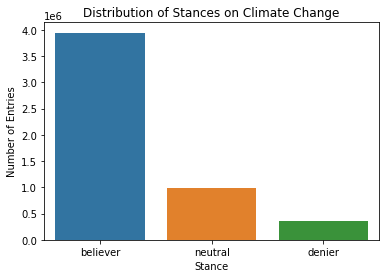

In [19]:
stance_counts = data['stance'].value_counts().reset_index()
stance_counts.columns = ['stance', 'count']
sns.barplot(x='stance', y='count', data=stance_counts)
plt.title('Distribution of Stances on Climate Change')
plt.ylabel('Number of Entries')
plt.xlabel('Stance')
plt.show()

Distribution of topics

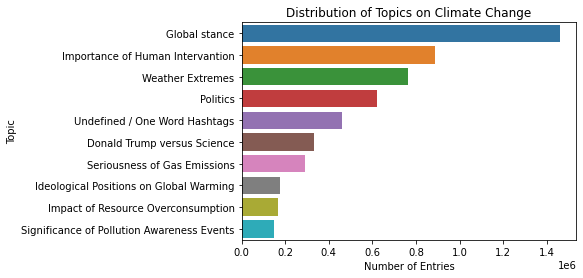

In [20]:
topic_counts = data['topic'].value_counts().reset_index()
topic_counts.columns = ['topic', 'count']
sns.barplot(x='count', y='topic', data=topic_counts)
plt.title('Distribution of Topics on Climate Change')
plt.xlabel('Number of Entries')
plt.ylabel('Topic')
plt.show()

The average environment temperature of people holding different stances

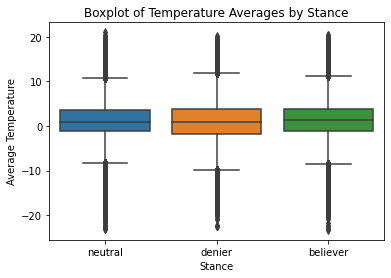

In [21]:
sns.boxplot(x='stance', y='temperature_avg', data=data)
plt.title('Boxplot of Temperature Averages by Stance')
plt.ylabel('Average Temperature')
plt.xlabel('Stance')
plt.show()

The change of sentiment over time

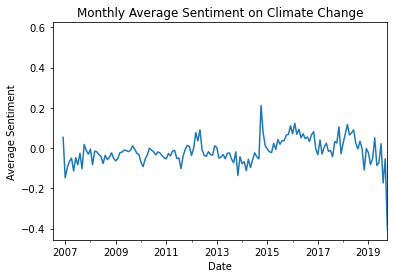

In [22]:
data['created_at'] = pd.to_datetime(data['created_at'])
monthly_sentiment = data.set_index('created_at').resample('M')['sentiment'].mean()
monthly_sentiment.plot(title='Monthly Average Sentiment on Climate Change')
plt.ylabel('Average Sentiment')
plt.xlabel('Date')
plt.show()

### Correlation Analysis

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
numerical_cols = ['lng', 'lat', 'sentiment', 'temperature_avg']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

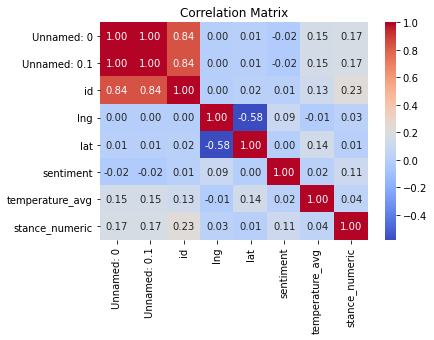

stance_numeric     1.000000
id                 0.225570
Unnamed: 0.1       0.166651
Unnamed: 0         0.166651
sentiment          0.108173
temperature_avg    0.043823
lng                0.028414
lat                0.005262
Name: stance_numeric, dtype: float64


In [25]:
stance_mapping = {'denier': -1, 'neutral': 0, 'believer': 1}
data['stance_numeric'] = data['stance'].map(stance_mapping)

numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix including the new numeric stance column
correlation_matrix = numeric_data.corr()

# Look for high absolute values in the 'stance_numeric' row/column of the correlation matrix
high_correlation = correlation_matrix['stance_numeric'].abs().sort_values(ascending=False)

# Visualization of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Print out the high correlations for analysis
print(high_correlation)

From the Correlation Matrix we can tell that the correlation between stance and average temperature is 0.043823.

### Clustering - Preprocessing

Next, we'll cluster the data and see if we can grasp any insights.


We need to preprocess the data and encode categorical features

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [27]:
list(data.columns)

['Unnamed: 0',
 'Unnamed: 0.1',
 'created_at',
 'id',
 'lng',
 'lat',
 'topic',
 'sentiment',
 'stance',
 'gender',
 'temperature_avg',
 'aggressiveness',
 'country',
 'stance_numeric']

In [28]:
data['topic'].value_counts()

Global stance                                 1462525
Importance of Human Intervantion               889463
Weather Extremes                               761129
Politics                                       618945
Undefined / One Word Hashtags                  458904
Donald Trump versus Science                    333777
Seriousness of Gas Emissions                   291323
Ideological Positions on Global Warming        176568
Impact of Resource Overconsumption             164996
Significance of Pollution Awareness Events     149908
Name: topic, dtype: int64

In [29]:
data['gender'].value_counts()

male         3485846
female       1659423
undefined     162269
Name: gender, dtype: int64

In [30]:
data['stance'].value_counts()

believer    3947378
neutral      994843
denier       365317
Name: stance, dtype: int64

In [31]:
data['aggressiveness'].value_counts()

not aggressive    3774449
aggressive        1533089
Name: aggressiveness, dtype: int64

In [32]:
data['aggressive_numeric'] = data['aggressiveness'].apply(lambda x: 1 if x == 'aggressive' else 0)

In [33]:
data['aggressive_numeric'].value_counts()

0    3774449
1    1533089
Name: aggressive_numeric, dtype: int64

In [34]:
ss_columns = ['sentiment', 'lng', 'lat']
oh_columns = ['gender', 'topic']
passthrough_columns = ['aggressive_numeric']

In [35]:
pipeline = ColumnTransformer([
    ('standard_scale', StandardScaler(), ss_columns),
    ('one_hot', OneHotEncoder(), oh_columns),
    ('pass_through', 'passthrough', passthrough_columns)
])

In [36]:
data_preprocessed = pipeline.fit_transform(data)

In [37]:
data_preprocessed

array([[ 1.26729633e+00, -3.66314212e-01,  2.94687695e-01, ...,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [-1.27359600e+00, -1.01058912e+00,  1.65723140e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-1.32085987e+00, -4.43973028e-01,  8.93677298e-02, ...,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       ...,
       [ 8.35858886e-01,  6.87596346e-01,  7.55804312e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.59509510e+00, -9.55083992e-01, -1.25680151e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.40790598e-01,  1.95253853e+00, -9.11725168e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

### Clustering - Model Selection

In [38]:
from sklearn.metrics import rand_score, adjusted_rand_score, davies_bouldin_score, calinski_harabasz_score 
def evaluate_model(model):
    predictions = model.fit_predict(data_preprocessed)
    truth = data['stance']
    rs = rand_score(truth, predictions)
    ars = adjusted_rand_score(truth, predictions)
    davies_bouldin = davies_bouldin_score(data_preprocessed, predictions)
    calinski_harabasz = calinski_harabasz_score(data_preprocessed, predictions)
    print(f'==={model.__class__.__name__}===\n', f'rand: {rs}\n', f'adj. rand: {ars}\n', f'davies-bouldin: {davies_bouldin}\n', f'calinski-harabasz: {calinski_harabasz}')

In [39]:
from sklearn.cluster import KMeans

kmeans = KMeans(random_state=65, n_clusters=3)
evaluate_model(kmeans)

/Users/chen/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


===KMeans===
 rand: 0.4835191915513396
 adj. rand: 0.0014881230706690687
 davies-bouldin: 1.462557664145341
 calinski-harabasz: 2053181.6934946403


In [40]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=65)
evaluate_model(gmm)

===GaussianMixture===
 rand: 0.5216139939727356
 adj. rand: 0.051277542639701836
 davies-bouldin: 3.7065701510246107
 calinski-harabasz: 167676.9981736599


Spectral and Heirarchical clustering could not be included due to memory constraints.

KMeans seems to create better, well-separated clusters based on the Davies-Bouldin and Calinski-Harabasz scores, but from a true-label stand point the Gaussian Mixture model seems to perform better at distinguishing belief in climate change. 

### Clustering - Gaussian Mixture grid search

Do a manual grid search for better clusters

In [41]:
grid_search = {
    'n_components': [3, 5, 10, 15],
    'covariance_type': ['full', 'tied', 'diag', 'spherical']
}

In [42]:
grid_search_results = []
for n_components in grid_search['n_components']:
    for covariance_type in grid_search['covariance_type']:
        gmm = GaussianMixture(random_state=65, n_components=n_components, covariance_type=covariance_type)
        predictions = gmm.fit_predict(data_preprocessed)
        db_score = davies_bouldin_score(data_preprocessed, predictions)
        ch_score = calinski_harabasz_score(data_preprocessed, predictions)
        print(f'clusters: {n_components} | covariance: {covariance_type} | davies-boulin: {db_score} | calinski-harabasz: {ch_score}')
        grid_search_results.append({
            'clusters': n_components,
            'covariance': covariance_type,
            'db_score': db_score,
            'ch_score': ch_score
        })

clusters: 3 | covariance: full | davies-boulin: 3.7065701510246107 | calinski-harabasz: 167676.9981736599
clusters: 3 | covariance: tied | davies-boulin: 1.4646858604683182 | calinski-harabasz: 2005753.9610802778
clusters: 3 | covariance: diag | davies-boulin: 4.18747685994419 | calinski-harabasz: 94368.55146295794
clusters: 3 | covariance: spherical | davies-boulin: 1.4795507551733824 | calinski-harabasz: 2028937.2181951355
clusters: 5 | covariance: full | davies-boulin: 3.8501095272554293 | calinski-harabasz: 196662.35141274767
clusters: 5 | covariance: tied | davies-boulin: 1.675980398198843 | calinski-harabasz: 989511.4581328534
clusters: 5 | covariance: diag | davies-boulin: 3.555917036674714 | calinski-harabasz: 182887.1321073418
clusters: 5 | covariance: spherical | davies-boulin: 1.5333746706896751 | calinski-harabasz: 1425350.8611858708


In [ ]:
results_df = pd.DataFrame(grid_search_results)

In [ ]:
results_df.to_csv('data/grid_search_results.csv')

In [ ]:
results_df.sort_values(by=['db_score']).head()

,clusters,covariance,db_score,ch_score
1,3,tied,1.464686,2.005754e+06
3,3,spherical,1.479551,2.028937e+06
7,5,spherical,1.533375,1.425351e+06
5,5,tied,1.675980,9.895115e+05
11,10,spherical,1.741683,9.851823e+05


In [ ]:
results_df.sort_values(by=['ch_score'], ascending=False).head()

,clusters,covariance,db_score,ch_score
3,3,spherical,1.479551,2.028937e+06
1,3,tied,1.464686,2.005754e+06
7,5,spherical,1.533375,1.425351e+06
5,5,tied,1.675980,9.895115e+05
11,10,spherical,1.741683,9.851823e+05


Pick 5 clusters with spherical covariance arbitrarily for best scores with more than 3 clusters, since we want to see if we can more groupings for more detailed analysis

### Clustering - Final clustering

In [ ]:
# Leave commented to prevent unnecessary re-processing

# final_model = GaussianMixture(random_state=65, n_components=5, covariance_type='spherical')

In [ ]:
# data['cluster'] = final_model.fit_predict(data_preprocessed)

In [ ]:
# data.head()

In [ ]:
# data['cluster'].value_counts()

In [ ]:
# data.to_csv('data/clustered_data.csv')

### Clustering Analysis

In [ ]:
data = pd.read_csv('data/clustered_data.csv')

In [ ]:
data.shape

(5307538, 16)

In [ ]:
# Cluster size distribution
print(data['cluster'].value_counts())

cluster
0    2030853
3    1119569
4     862147
2     664679
1     630290
Name: count, dtype: int64


1. **Cluster 0** is the largest cluster, containing 2,030,853 tweets. The size of this cluster suggests that it may represent the most common or dominant pattern within the dataset.  
2. With 1,119,569 tweets, **Cluter 3** is the second-largest cluster. Although smaller than Cluster 0, it still represents a significant portion of the dataset and reflects another prominent grouping pattern in the data.  
3. **Cluster 4** has 862,147 tweets, which makes it medium-sized compared to the others. 
4. **Cluster 2** includes 664,679 tweets. It's one of the smaller clusters, which might indicate a more specific or less common pattern in the stance towards climate change or other features.
5. **Cluster 2** is the smallest cluster with 630,290 tweets. Being the smallest may indicate a unique or niche pattern that fewer tweets adhere to.

In [ ]:
for cluster in sorted(data['cluster'].unique()):
    print(f"--- Cluster {cluster} Profile ---")
    cluster_data = data[data['cluster'] == cluster]
    
    # Calculate mean and median for numerical features
    mean_sentiment = cluster_data['sentiment'].mean()
    median_sentiment = cluster_data['sentiment'].median()
    mean_temperature = cluster_data['temperature_avg'].mean()
    median_temperature = cluster_data['temperature_avg'].median()
    
    print(f"Sentiment - Mean: {mean_sentiment}, Median: {median_sentiment}")
    print(f"Temperature Avg - Mean: {mean_temperature}, Median: {median_temperature}")
    
    # Categorical analysis
    gender_distribution = cluster_data['gender'].value_counts(normalize=True) * 100
    topic_distribution = cluster_data['topic'].value_counts(normalize=True) * 100
    country_distribution = cluster_data['country'].value_counts(normalize=True) * 100
    
    print("Gender Distribution:")
    print(gender_distribution)
    print("Topic Distribution:")
    print(topic_distribution)
    print("Country Distribution:")
    print(country_distribution)
    print("\n")

--- Cluster 0 Profile ---
Sentiment - Mean: -0.41206458452697015, Median: -0.4264838088274003
Temperature Avg - Mean: 1.299209237325424, Median: 1.4386175
Gender Distribution:
gender
male         68.412682
female       28.408211
undefined     3.179107
Name: proportion, dtype: float64
Topic Distribution:
topic
Global stance                                 20.494442
Weather Extremes                              18.694066
Politics                                      15.449912
Importance of Human Intervantion              13.451343
Donald Trump versus Science                    9.283587
Seriousness of Gas Emissions                   6.211577
Ideological Positions on Global Warming        5.868618
Impact of Resource Overconsumption             4.092418
Undefined / One Word Hashtags                  3.608287
Significance of Pollution Awareness Events     2.845750
Name: proportion, dtype: float64
Country Distribution:
country
US    72.634996
CA     9.694695
GB     9.400927
DE     0.785434
FR

### Cluster Analysis Insights

The clustering reveals distinct characteristics, preferences, and behaviors among the groups.  

#### Cluster 0 - The Pessimists
- **Sentiment**: Predominantly negative sentiment.
- **Temperature Avg**: Slightly higher average temperature, indicating tweets possibly from warmer regions or times.
- **Gender**: Majority male, with a significant female representation.
- **Top Topics**: Global stance, weather extremes, politics.
- **Geographic Distribution**: Dominantly US, with notable mentions of CA and GB.

#### Cluster 1 - Moderates
- **Sentiment**: Near-neutral sentiment.
- **Temperature Avg**: Close to average temperatures.
- **Gender**: Majority male but with a significant portion of undefined genders, suggesting possibly less personal or anonymous accounts.
- **Top Topics**: Global stance, human intervention importance.
- **Geographic Distribution**: Diverse, with a strong presence in AU, IN, and ID.

#### Cluster 2 - The Optimists
- **Sentiment**: Positive sentiment.
- **Temperature Avg**: Slightly higher average temperature.
- **Gender**: Overwhelmingly female.
- **Top Topics**: Global stance, human intervention importance.
- **Geographic Distribution**: Primarily US, with CA also prominent.

#### Cluster 3 - Very Positive Males
- **Sentiment**: Very positive sentiment.
- **Temperature Avg**: Slightly above-average temperature.
- **Gender**: Almost exclusively male.
- **Top Topics**: Global stance, human intervention importance.
- **Geographic Distribution**: Largely US and CA, with a wide geographic spread.

#### Cluster 4 - Global Concern with a Warm Perspective
- **Sentiment**: Positive sentiment, but less so than Cluster 3.
- **Temperature Avg**: Significantly higher average temperature, suggesting a focus on warmer regions or concerns about warming.
- **Gender**: Majority male with a substantial female presence.
- **Top Topics**: Global stance, human intervention, undefined or general hashtags.
- **Geographic Distribution**: Predominantly GB, suggesting a significant UK presence, followed by FI and IN.

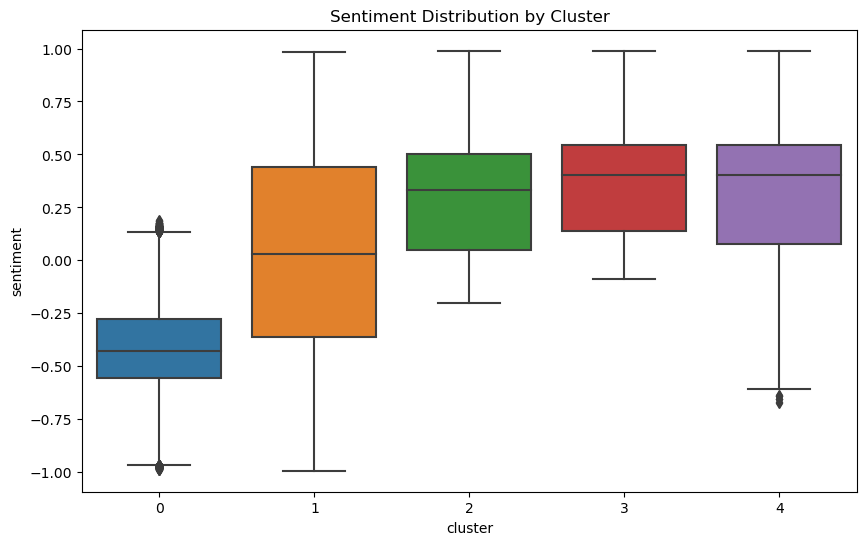

In [ ]:
# Plot Sentiment Distribution by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='sentiment', data=data)
plt.title('Sentiment Distribution by Cluster')
plt.show()

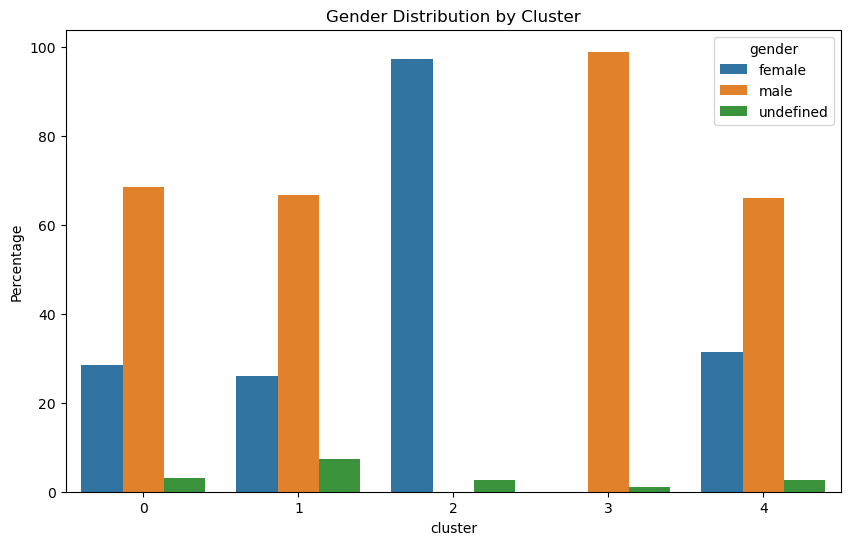

In [ ]:
# Plot Gender Distribution by Cluster
gender_distribution = data.groupby(['cluster', 'gender']).size().reset_index(name='counts')
gender_distribution['percentage'] = gender_distribution.groupby('cluster')['counts'].transform(lambda x: x / x.sum() * 100)

plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='percentage', hue='gender', data=gender_distribution)
plt.title('Gender Distribution by Cluster')
plt.ylabel('Percentage')
plt.show()

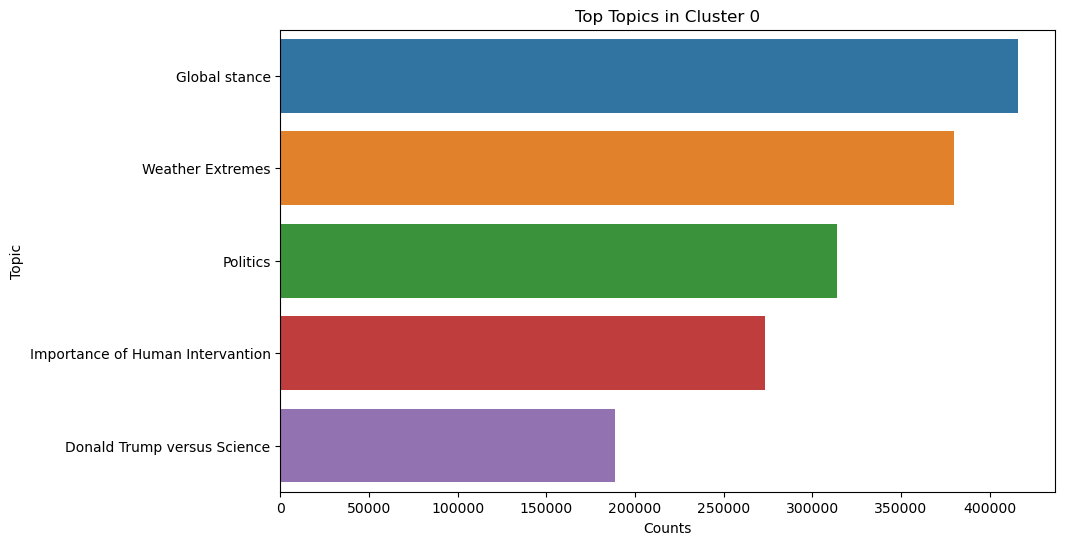

In [ ]:
# Plot Top Topics in Cluster 0
top_topics_cluster_0 = data[data['cluster'] == 0]['topic'].value_counts().nlargest(5).reset_index()
top_topics_cluster_0.columns = ['topic', 'counts']

plt.figure(figsize=(10, 6))
sns.barplot(x='counts', y='topic', data=top_topics_cluster_0)
plt.title('Top Topics in Cluster 0')
plt.xlabel('Counts')
plt.ylabel('Topic')
plt.show()

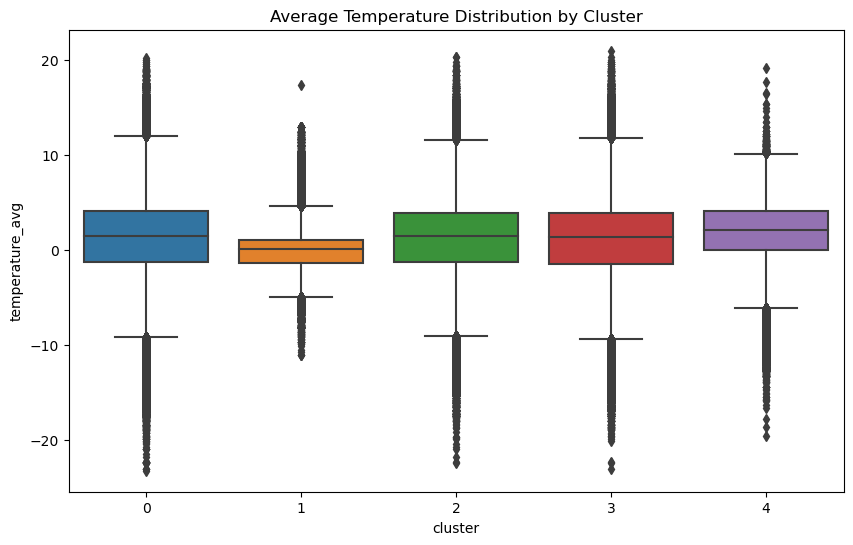

In [ ]:
# Plot Average Temperature Distribution by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='temperature_avg', data=data)
plt.title('Average Temperature Distribution by Cluster')
plt.show()

#### Observations:
- **Sentiment vs. Stance**: Sentiment varies across clusters, with Clusters 2 and 3 showing notably positive sentiment, possibly reflecting a proactive or supportive stance towards climate change actions. Cluster 0's negative sentiment could indicate criticism or concern regarding climate change issues or policies.
- **Gender Distribution**: Gender distribution varies, with Cluster 2 uniquely dominated by female tweeters, which could influence the topics and sentiment observed.
- **Temperature Concerns**: The temperature_avg's association with clusters suggests potential links between climate conditions (or concerns about them) and the clusters' characteristics, particularly in Cluster 4, which has the highest temperature average.
- **Geographic and Topic Diversities**: The clusters show geographic diversity, with certain clusters having strong presences in specific countries. Topic preferences also vary, possibly reflecting different public discourse focuses in different regions or among different genders.

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?



# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy

The integration of machine learning (ML) in analyzing social media datasets, especially on sensitive topics as significant as climate change, necessitates a rigorous ethical and privacy framework. Our dataset “Climate Change Twitter Dataset” from Kaggle presents both an opportunity for insightful analysis and responsibility to address potential ethical and privacy concerns. In this section, we will outline our commitment to ethical research practices and privacy preservation, addressing our potential concerns and the proactive actions we are going to take.

We will protect privacy and anonymity for every individual in our dataset. Though the data from Twitter is public, the dataset contains geolocation and gender information that may lead to identification of individuals. This raises concerns about the privacy of the individuals whose data are included in the dataset. We will adhere strictly to anonymizing any data used in our analysis and use geolocation data cautiously to ensure individuals cannot be identified through tweets locations. In addition, the hydrating process of tweets will be conducted with the awareness of Twitter’s privacy policy and our aim to prevent unauthorized disclosure of user information.

Due to the comprehensive nature of the twitter dataset including sentiment analysis on climate change, it poses risks of misinterpretation and misuse. We will implement rigorous data interpretation guidelines to ensure that our analysis respects the complexity of human opinions and avoids misrepresentation.

In order to avoid potential bias within our dataset, the diverse methodologies used to generate the dataset (e.g., BERT, LSTM, CNN) are not immune to biases present in the underlying data or in the algorithms themselves. We commit to actively seeking out and mitigating these biases, ensuring our analysis promotes fairness and accuracy. Our team will conduct regular reviews of our models and methodologies to identify and correct for biases, ensuring our work contributes positively to the discourse around climate change and social media analysis. Tools like Deon will be used to systematically address ethical issues throughout the project lifecycle. This includes careful consideration of the ethical implications of data collection, analysis, and dissemination. 

We acknowledge that there may be unintended consequences as a result of our data analysis. We will take special care to avoid any analysis that could be used to target or discriminate against individuals based on their opinions, gender, nationalities, or any other attribute. Furthermore, while Twitter is a public platform, the users' informed consent for this specific form of data analysis and aggregation might not have been obtained. Our project will acknowledge this limitation and the ethical implications of using publicly available data for research purposes, citing the original papers as required and providing transparency about our research intentions and methods.

We are committed to transparency in our research and will offer both a summary and comprehensive details of the procedures we undertake in our analysis, along with any issues that might emerge during this process. The main objective of our project is to enhance public and environmental safety and reduce any possible negative impacts.


### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
<a name="ipccnote"></a>1.[^](#ipcc):  Intergovernmental Panel on Climate Change. (2021). Climate Change 2021: The Physical Science Basis. Contribution of Working Group I to the Sixth Assessment Report of the Intergovernmental Panel on Climate Change. [IPCC]. https://www.ipcc.ch/report/ar6/wg1/
<br> 
<a name="article2note"></a>2.[^](#article2): Effrosynidis, D., Sylaios, G., & Arampatzis, A. (2022). Exploring climate change on Twitter using seven aspects: Stance, sentiment, aggressiveness, temperature, gender, topics, and disasters. PLOS ONE, 17(9), e0274213. https://doi.org/10.1371/journal.pone.0274213<br>
<a name="article3note"></a>3.[^](#article3): Effrosynidis, D., Karasakalidis, A. I., Sylaios, G., & Arampatzis, A. (2022). The climate change Twitter dataset. Expert Systems with Applications, 204, 117541. https://doi.org/10.1016/j.eswa.2022.117541
